# Experimental data

In [1]:
import torch
import pyro
import pyro.distributions as dist
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)


In [3]:
from sklearn.metrics import matthews_corrcoef, confusion_matrix, \
                            precision_score, recall_score, \
                            roc_curve

from scipy.io import loadmat

## Orange dye non-attenuated data

Tracker v1.1.3flat

In [2]:
results = {}
predictions = {}
true_labels = {}

names = ["FL_5555_6684_1p3OD", "FL_4445_5554_1p1OD", "FL_3339_4444_0p8OD",
         "FL_2226_3338_0p6OD", "FL_1118_2225_0p3OD", "FL_1_1117_0OD"]

for name in names:
    results[name] = pd.read_csv(
        "/shared/centaur/data/experimental/nonattenuated/{}/runs/tracker/v1.1.3flat/S1/nocontrol/lr0.005/bs10/params_last.csv"
        .format(name),
        header=None, squeeze=True, index_col=0)
    predictions[name] = np.load(
        "/shared/centaur/data/experimental/nonattenuated/{}/runs/tracker/v1.1.3flat/S1/nocontrol/lr0.005/bs10/predictions.npy"
        .format(name))
    true_labels[name] = np.load("/shared/centaur/data/experimental/nonattenuated/{}/labels.npy".format(name))

In [3]:
pd.DataFrame(data=results).T.drop(columns=[float("nan"), "pi_0", "lamda_0", "width_mode_0", "width_size_0"])

,iter,-ELBO,gain,pi_1,lamda_1,MCC,Recall,Precision,FN,TP,TN,FP
FL_5555_6684_1p3OD,29900.0,40515940.0,6.852407,0.038298,0.031055,0.915697,0.905947,0.929078,68.0,655.0,33728.0,50.0
FL_4445_5554_1p1OD,29900.0,30591322.0,6.725662,0.101534,0.023240,0.964020,0.967828,0.964596,48.0,1444.0,22999.0,53.0
FL_3339_4444_0p8OD,29900.0,36886452.0,6.634371,0.074356,0.015539,0.895820,0.975260,0.828540,19.0,749.0,26324.0,155.0
FL_2226_3338_0p6OD,29900.0,43654948.0,6.926970,0.098242,0.075726,0.961233,0.962511,0.964690,83.0,2131.0,33921.0,78.0
FL_1118_2225_0p3OD,29900.0,45101560.0,6.566349,0.031429,0.038498,0.927009,0.929752,0.927198,51.0,675.0,35441.0,53.0
FL_1_1117_0OD,29900.0,49636644.0,6.729361,0.030443,0.090154,0.899000,0.878672,0.923490,95.0,688.0,41842.0,57.0


## Orange dye attenuated data

In [157]:
snr = np.array([0.63, 0.79, 1.12, 1.41, 1.99, 2.81]) * 2.1 / 2.81

Tracker v1.1.3

In [14]:
results = {}
predictions = {}
true_labels = {}

names = ["FL_5555_6684_1p3OD_atten_noHysteresis_0p5_prob", "FL_4445_5554_1p1OD_atten_noHysteresis_0p5_prob",
         "FL_3339_4444_0p8OD_atten_noHysteresis_0p5_prob", "FL_2226_3338_0p6OD_atten_noHysteresis_0p5_prob",
         "FL_1118_2225_0p3OD_atten_noHysteresis_0p5_prob", "FL_1_1117_0OD_atten_noHysteresis_0p5_prob"]

for name in names:
    results[name] = pd.read_csv(
        "/shared/centaur/data/experimental/attenuated/{}/runs/tracker/v1.1.3flat/S1/nocontrol/lr0.005/bs10/params_last.csv"
        .format(name),
        header=None, squeeze=True, index_col=0)
    predictions[name] = np.load(
        "/shared/centaur/data/experimental/attenuated/{}/runs/tracker/v1.1.3flat/S1/nocontrol/lr0.005/bs10/predictions.npy"
        .format(name))
    true_labels[name] = np.load("/shared/centaur/data/experimental/attenuated/{}/labels.npy".format(name))

In [15]:
scores_v1p13 = pd.DataFrame(data=results).T.drop(columns=[float("nan"), "pi_0", "lamda_0", "width_mode_0", "width_size_0"])
scores_v1p13

,iter,-ELBO,gain,pi_1,lamda_1,MCC,Recall,Precision,FN,TP,TN,FP
FL_5555_6684_1p3OD_atten_noHysteresis_0p5_prob,29900.0,27305760.0,1.769059,0.003534,0.026631,0.389858,0.163389,0.947368,553.0,108.0,33744.0,6.0
FL_4445_5554_1p1OD_atten_noHysteresis_0p5_prob,29900.0,20433688.0,2.877008,0.014074,0.027418,0.502883,0.266805,0.992268,1058.0,385.0,23013.0,3.0
FL_3339_4444_0p8OD_atten_noHysteresis_0p5_prob,29900.0,25251286.0,5.252812,0.023329,0.002412,0.721728,0.591700,0.894737,305.0,442.0,26305.0,52.0
FL_2226_3338_0p6OD_atten_noHysteresis_0p5_prob,29900.0,31451082.0,6.725665,0.073904,0.008817,0.927197,0.890618,0.973711,232.0,1889.0,33878.0,51.0
FL_1118_2225_0p3OD_atten_noHysteresis_0p5_prob,29900.0,36758332.0,6.801042,0.042468,0.017617,0.941185,0.974702,0.910987,17.0,655.0,35391.0,64.0
FL_1_1117_0OD_atten_noHysteresis_0p5_prob,29900.0,44042968.0,6.901953,0.040881,0.093299,0.880256,0.980422,0.793902,13.0,651.0,41700.0,169.0


In [16]:
scores_v1p13["Recall"].values

array([0.1633888 , 0.26680527, 0.59170013, 0.89061763, 0.97470238,
       0.98042169])

In [160]:
scores_sp = pd.DataFrame(data={"spMCC": [matthews_corrcoef(true_labels[name]["z"][true_labels[name]["z"]<2], true_labels[name]["spotpicker"][true_labels[name]["z"]<2]) for name in names],
                   "spRecall": [recall_score(true_labels[name]["z"][true_labels[name]["z"]<2], true_labels[name]["spotpicker"][true_labels[name]["z"]<2]) for name in names],
                   "spPrecision": [precision_score(true_labels[name]["z"][true_labels[name]["z"]<2], true_labels[name]["spotpicker"][true_labels[name]["z"]<2]) for name in names],
                    },
             index=names)
scores_sp

,spMCC,spRecall,spPrecision
FL_5555_6684_1p3OD_atten_noHysteresis_0p5_prob,0.426138,0.211800,0.875000
FL_4445_5554_1p1OD_atten_noHysteresis_0p5_prob,0.480272,0.244629,0.988796
FL_3339_4444_0p8OD_atten_noHysteresis_0p5_prob,0.674511,0.514056,0.901408
FL_2226_3338_0p6OD_atten_noHysteresis_0p5_prob,0.893359,0.857614,0.942976
FL_1118_2225_0p3OD_atten_noHysteresis_0p5_prob,0.910230,0.962798,0.863818
FL_1_1117_0OD_atten_noHysteresis_0p5_prob,0.840818,0.980422,0.725753


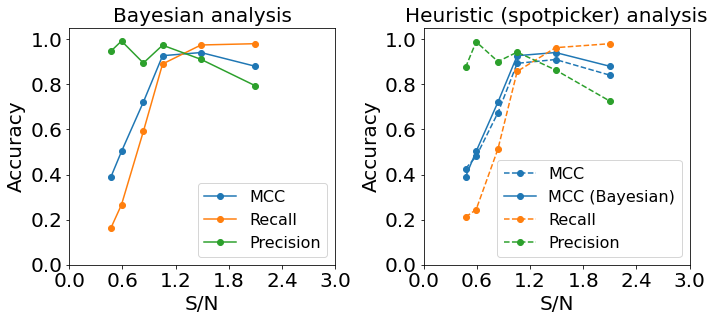

In [161]:
plt.figure(figsize=(10,8))

plt.subplot(221)
plt.plot(snr, scores_v1p13["MCC"], "o-", label="MCC")
plt.plot(snr, scores_v1p13["Recall"], "o-", label="Recall")
plt.plot(snr, scores_v1p13["Precision"], "o-", label="Precision")

plt.ylim(0,1.05)
plt.xlim(0,1)
plt.xlabel(r"S/N", fontsize=20)
plt.ylabel(r"Accuracy", fontsize=20)
plt.title(r"Bayesian analysis", fontsize=20)

plt.gca().axes.get_xaxis().set_ticks(np.arange(6)*0.6)
plt.gca().axes.get_yaxis().set_ticks(np.arange(6)*0.2)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=16)

plt.subplot(222)
plt.plot(snr, scores_sp["spMCC"], "o--", label="MCC")
plt.plot(snr, scores_v1p13["MCC"], "o-", color="C0", label="MCC (Bayesian)")
plt.plot(snr, scores_sp["spRecall"], "o--", label="Recall")
plt.plot(snr, scores_sp["spPrecision"], "o--", label="Precision")
plt.ylim(0,1.05)
plt.xlim(0,1)
plt.xlabel(r"S/N", fontsize=20)
plt.ylabel(r"Accuracy", fontsize=20)
plt.title(r"Heuristic (spotpicker) analysis", fontsize=20)

plt.gca().axes.get_xaxis().set_ticks(np.arange(6)*0.6)
plt.gca().axes.get_yaxis().set_ticks(np.arange(6)*0.2)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=16)


plt.tight_layout()
plt.show()

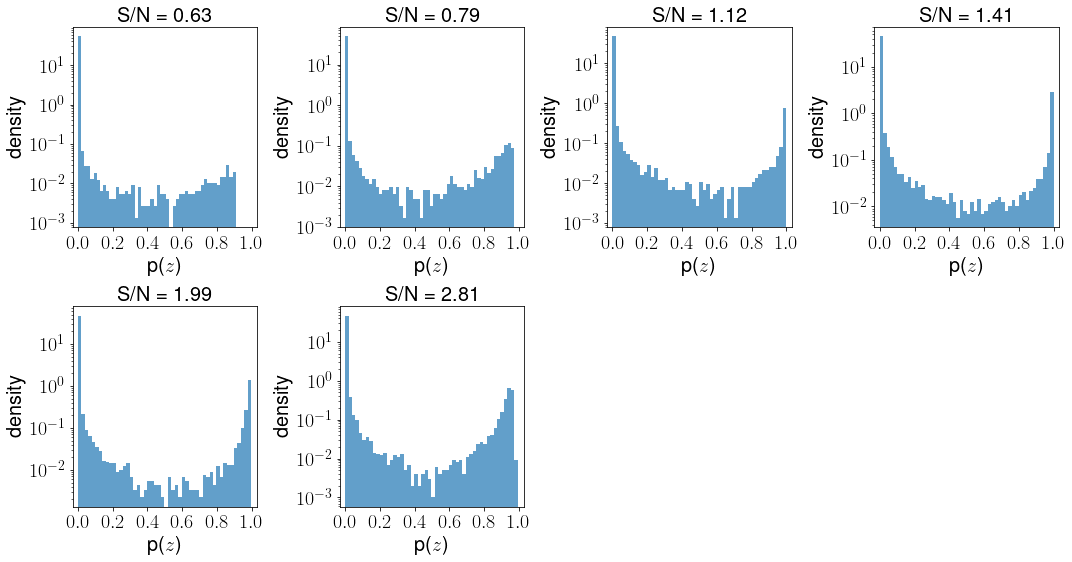

In [76]:
plt.figure(figsize=(15,15))
for i, name in enumerate(names):
    plt.subplot(4, 4, i+1)
    plt.hist(predictions[name]["z_prob"].ravel(), bins=50, density=True, alpha=0.7)
    plt.xlim(-0.03, 1.03)
    #plt.ylim(0, 10)
    plt.yscale('log', nonpositive='clip')
    #plt.gca().axes.get_xaxis().set_ticks([0.8, 0.9, 1])
    #plt.gca().axes.get_yaxis().set_ticks(np.arange(6)*0.2)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.xlabel(r"p($z$)", fontsize=20)
    plt.ylabel(r"density", fontsize=20)
    plt.title(r"S/N = {}".format(snr[i]), fontsize=20)

plt.tight_layout()
plt.show()

In [4]:
names = ["FL_5555_6684_1p3OD_atten_noHysteresis_0p5_prob", "FL_4445_5554_1p1OD_atten_noHysteresis_0p5_prob",
         "FL_3339_4444_0p8OD_atten_noHysteresis_0p5_prob", "FL_2226_3338_0p6OD_atten_noHysteresis_0p5_prob",
         "FL_1118_2225_0p3OD_atten_noHysteresis_0p5_prob", "FL_1_1117_0OD_atten_noHysteresis_0p5_prob"]

In [5]:
from cosmos.models import Tracker

In [6]:
snrs = []

In [7]:
name = names[5]
path_data = "/shared/centaur/data/experimental/attenuated/{}/".format(name)
path_params = "/shared/centaur/data/experimental/attenuated/{}/runs/tracker/v1.1.3flat/S1/nocontrol/lr0.005/bs10".format(name)

In [8]:
model = Tracker(S=1)
model.load(path_data, False, "cpu")
model.load_parameters(path_params)

In [9]:
from pyro.infer import Predictive

predictive = Predictive(model.model, guide=model.guide, num_samples=2)

In [10]:
samples = predictive()

In [11]:
samples.keys()

dict_keys(['d/background', 'd/theta', 'd/m_0', 'd/height_0', 'd/width_0', 'd/x_0', 'd/y_0', 'd/m_1', 'd/height_1', 'd/width_1', 'd/x_1', 'd/y_1', 'd/data'])

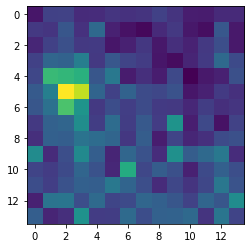

In [12]:
plt.imshow(samples["d/data"][0, 0, 0].numpy())
plt.show()

In [12]:
spot = model.data_loc(
    pyro.param("d/h_loc").data[0],
    pyro.param("d/w_mode").data[0],
    pyro.param("d/x_mode").data[0],
    pyro.param("d/y_mode").data[0],
    torch.arange(model.data.N)[:, None],
    torch.arange(model.data.F))

In [13]:
signal = spot ** 2 / pyro.param("d/h_loc").data[0, :, :, None, None]
signal = signal.sum(dim=(-2,-1))

In [14]:
model.data.offset.var()

tensor(13.0769)

In [15]:
noise = (pyro.param("d/b_loc").data * pyro.param("gain").item() + model.data.offset.var()).sqrt()
noise.mean()

tensor(21.8066)

In [16]:
noise = (pyro.param("d/b_loc").data * pyro.param("gain").item()).sqrt()
noise.mean()

tensor(21.4995)

In [17]:
snr = signal / noise

In [18]:
mask = pyro.param("d/theta_probs")[..., 1] > 0.5

In [19]:
height = pyro.param("d/h_loc")[0].data[mask]
width = pyro.param("d/w_mode")[0].data[mask]
x = pyro.param("d/x_mode")[0].data[mask]
y = pyro.param("d/y_mode")[0].data[mask]
snr = snr[mask]

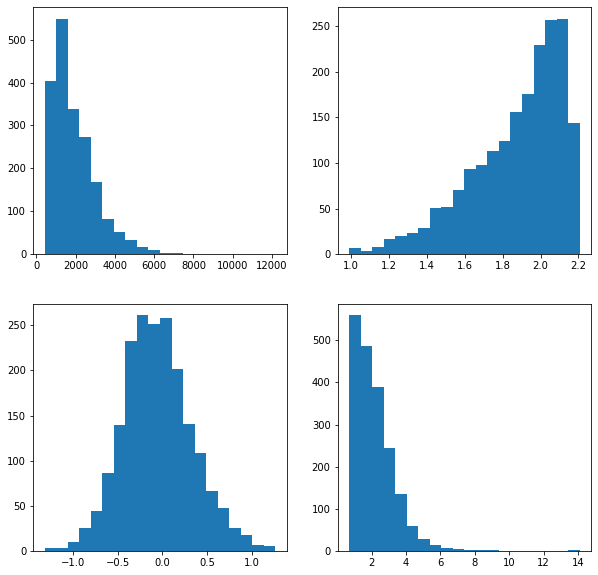

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.hist(height.numpy(), bins=20)

plt.subplot(222)
plt.hist(width.numpy(), bins=20)

plt.subplot(223)
plt.hist(x.numpy(), bins=20)

plt.subplot(224)
plt.hist(snr.numpy(), bins=20)
plt.show()

In [21]:
snr.mean()

tensor(2.1416)

In [22]:
D = 14

rv = dist.MultivariateNormal(
    torch.tensor([6.5, 6.5]),
    scale_tril=torch.eye(2) * torch.tensor([1.4])[..., None, None])

D_range = torch.arange(D, dtype=torch.float)
i_pixel, j_pixel = torch.meshgrid(D_range, D_range)
ij_pixel = torch.stack((i_pixel, j_pixel), dim=-1)

In [ ]:
# calculate signal-to-noise ratio
snr = []
for h in heights:
    spot = rv.log_prob(ij_pixel).exp() * float(h)
    signal = (spot * rv.log_prob(ij_pixel).exp()).sum()
    noise = (background * gain).sqrt()
    snr.append(float(signal / noise))